<a href="https://colab.research.google.com/github/Akshayspn/RNN_LSTM/blob/main/disease_pediction3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DISEASE PREDICTION

#### IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd

In [3]:
! unzip '/content/Training.csv.zip'

Archive:  /content/Training.csv.zip
  inflating: Training.csv            


In [396]:
train=pd.read_csv("/content/Training.csv", nrows=10000)
test=pd.read_csv("/content/Testing.csv")

In [397]:
# train['prognosis'].value_counts()
train.groupby(['prognosis']).nunique().head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
prognosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
AIDS,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
Acne,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,0
Alcoholic hepatitis,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
Allergy,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


#### DATASET CHECKING

In [398]:
train['prognosis'=='']

KeyError: ignored

In [399]:
train.count()

itching                 4920
skin_rash               4920
nodal_skin_eruptions    4920
continuous_sneezing     4920
shivering               4920
                        ... 
blister                 4920
red_sore_around_nose    4920
yellow_crust_ooze       4920
prognosis               4920
Unnamed: 133               0
Length: 134, dtype: int64

In [400]:
test.count()

itching                 42
skin_rash               42
nodal_skin_eruptions    42
continuous_sneezing     42
shivering               42
                        ..
inflammatory_nails      42
blister                 42
red_sore_around_nose    42
yellow_crust_ooze       42
prognosis               42
Length: 133, dtype: int64

#### DROP UNWANTED COLUMN

In [401]:
train=train.drop(["Unnamed: 133"],axis=1)

In [402]:
train.count()

itching                 4920
skin_rash               4920
nodal_skin_eruptions    4920
continuous_sneezing     4920
shivering               4920
                        ... 
inflammatory_nails      4920
blister                 4920
red_sore_around_nose    4920
yellow_crust_ooze       4920
prognosis               4920
Length: 133, dtype: int64

In [403]:
train.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [404]:
test.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

#### SPLITTING DATESET

In [405]:
P = train[["prognosis"]]
X = train.drop(["prognosis"],axis=1)
Y = test.drop(["prognosis"],axis=1)

In [406]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,P,test_size=0.3,random_state=20)

In [407]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier



In [408]:
xtest.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [409]:
xtrain.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [410]:
np.isinf(xtrain).any().head(133)


itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
small_dents_in_nails    False
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
Length: 132, dtype: bool

In [411]:
#Dimension reduction 

In [412]:

xtest.fillna(0,inplace=True)
xtest.isna()
xtest.replace({0: "False", 1: "True"}, inplace = True)
xtrain.fillna(0,inplace=True)
xtrain.isna()
xtrain.replace({0: "False", 1: "True"}, inplace = True)

In [413]:
! pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [414]:
#Preparing CA
# from prince import CA,mca
import prince 
# ca = CA(n_components=2,n_iter=3,random_state=101 )
#Fitting the data
# xtrain = xtrain.astype(float)
# xtest = xtest.astype(float)
# 

# mca = prince.MCA()

In [415]:
from prince import MCA
# mca = MCA()
mca = MCA(n_components = 21, n_iter = 30, random_state = 101)
mca=mca.fit(xtrain)

In [416]:
df_mca=pd.DataFrame(mca.eigenvalues_summary)

In [417]:
df_mca

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.073,7.32%,7.32%
1,0.066,6.60%,13.93%
2,0.052,5.20%,19.13%
3,0.048,4.84%,23.97%
4,0.043,4.35%,28.32%
5,0.037,3.75%,32.07%
6,0.036,3.62%,35.69%
7,0.035,3.52%,39.21%
8,0.034,3.39%,42.59%


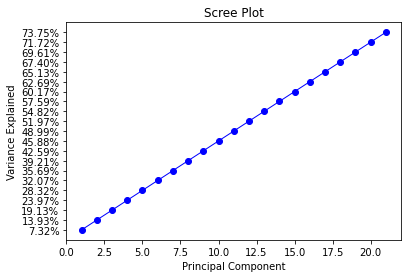

In [418]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(mca.n_components) + 1
plt.plot(PC_values, df_mca['% of variance (cumulative)'], 'o-', linewidth=1, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [155]:
mca.column_contributions_

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
itching_False,5.016623e-06,0.000354,0.001481,0.000017,4.089777e-04,0.000578,8.295935e-04,0.000054,0.001768,0.001073,...,2.255932e-04,1.444816e-03,1.218141e-04,0.001092,0.000557,0.000053,0.000062,0.000003,1.441143e-05,0.003015
itching_True,3.097764e-05,0.002184,0.009147,0.000105,2.525437e-03,0.003571,5.122740e-03,0.000332,0.010916,0.006627,...,1.393038e-03,8.921742e-03,7.522021e-04,0.006746,0.003438,0.000328,0.000384,0.000019,8.899060e-05,0.018620
skin_rash_False,8.651206e-06,0.000336,0.000045,0.001581,2.936655e-05,0.000818,3.160482e-04,0.003999,0.013642,0.000137,...,1.643306e-04,2.985739e-04,1.076906e-03,0.005796,0.000745,0.002911,0.002668,0.000054,1.781435e-04,0.000944
skin_rash_True,4.398970e-05,0.001708,0.000227,0.008039,1.493232e-04,0.004161,1.607044e-03,0.020334,0.069366,0.000697,...,8.355894e-04,1.518190e-03,5.475858e-03,0.029473,0.003789,0.014803,0.013568,0.000276,9.058252e-04,0.004799
nodal_skin_eruptions_False,2.555478e-06,0.000009,0.000010,0.000037,1.091257e-08,0.000012,8.616099e-06,0.000003,0.000077,0.000045,...,6.375020e-08,2.214074e-05,3.260840e-07,0.000093,0.000014,0.000006,0.000074,0.000014,2.220597e-07,0.000168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blister_True,2.610405e-05,0.000300,0.000830,0.002241,4.961156e-05,0.001059,2.786288e-05,0.001284,0.005328,0.001750,...,2.170178e-03,1.745878e-07,6.393578e-04,0.051863,0.073516,0.002675,0.005872,0.124662,9.984362e-05,0.005979
red_sore_around_nose_False,6.307324e-07,0.000007,0.000020,0.000055,1.212152e-06,0.000026,6.893558e-07,0.000031,0.000130,0.000042,...,5.277892e-05,4.681342e-09,1.545519e-05,0.001256,0.001779,0.000065,0.000142,0.003004,2.395936e-06,0.000143
red_sore_around_nose_True,2.652230e-05,0.000309,0.000852,0.002303,5.097098e-05,0.001087,2.898741e-05,0.001319,0.005460,0.001787,...,2.219354e-03,1.968504e-07,6.498905e-04,0.052822,0.074791,0.002728,0.005968,0.126337,1.007491e-04,0.006033
yellow_crust_ooze_False,6.081083e-07,0.000007,0.000019,0.000052,1.160118e-06,0.000025,6.543540e-07,0.000030,0.000124,0.000041,...,5.066676e-05,4.216947e-09,1.489596e-05,0.001209,0.001713,0.000062,0.000137,0.002901,2.320335e-06,0.000139


In [419]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.073,7.32%,7.32%
1,0.066,6.60%,13.93%
2,0.052,5.20%,19.13%
3,0.048,4.84%,23.97%
4,0.043,4.35%,28.32%
5,0.037,3.75%,32.07%
6,0.036,3.62%,35.69%
7,0.035,3.52%,39.21%
8,0.034,3.39%,42.59%


In [420]:
# ax = mca.plot_coordinates(
#      X=X,
#      ax=None,
#      figsize=(6, 6),
#      show_row_points=True,
#      row_points_size=10,
#      show_row_labels=False,
#      show_column_points=True,
#      column_points_size=30,
#      show_column_labels=False,
#      legend_n_cols=1
#      )

# ax.get_figure().savefig('./mca_coordinates.svg')


In [421]:
mca.row_coordinates


<bound method MCA.row_coordinates of <prince.mca.MCA object at 0x7fb25f735fd0>>

In [422]:
xt=mca.transform(xtrain)

In [423]:
xt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
180,0.068219,-0.098997,0.113271,0.069805,-0.100668,0.108431,0.357328,0.176596,0.010040,-0.198919,0.165379,-0.248092,0.144299,0.007526,0.287814,-0.306227,-0.190248,0.144092,0.042332,0.440989,-0.177158
1910,0.250154,0.148840,-0.034166,0.094676,0.011010,-0.401014,0.309989,-0.156683,-0.187225,0.057674,0.060227,0.150951,-0.025995,-0.016760,-0.042042,0.015058,-0.053352,0.011451,0.042622,-0.056341,-0.034496
2475,0.110820,-0.017872,0.016653,0.080783,-0.124695,0.047465,0.154075,-0.069403,-0.013962,-0.060082,0.079124,-0.162700,0.049746,0.008503,0.103048,-0.119402,-0.058359,0.011221,-0.000312,0.014880,-0.010055
4278,0.010018,-0.115951,0.196626,0.079410,0.069105,-0.035428,-0.036224,0.074420,-0.022430,0.042071,0.013046,0.005863,0.005626,0.050467,0.042154,0.008769,-0.047320,0.002830,0.008791,0.014259,-0.026835
709,0.024458,-0.034050,-0.056649,-0.043242,-0.024803,-0.085459,0.085851,-0.032285,-0.074564,0.077867,0.010344,0.030935,0.018692,0.009609,-0.094307,0.041201,-0.036316,-0.012524,0.006596,0.058292,0.007382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,-0.060650,-0.085283,-0.120809,-0.156816,-0.018002,-0.050964,-0.030283,-0.052932,0.141177,0.096087,-0.030364,-0.031902,-0.032870,0.030942,0.164227,0.175562,-0.032516,-0.423906,-0.324923,0.043479,0.051995
3915,0.027379,-0.144999,0.592339,0.116339,0.277848,-0.100562,-0.319729,0.221507,0.141770,0.100204,-0.505570,0.306935,-0.328905,-0.146295,0.080080,-0.159312,-0.371880,0.090407,0.101654,-0.024512,-0.015955
1428,0.065905,-0.181645,0.328492,0.080006,-0.021380,0.076637,-0.018688,-0.028876,-0.021053,-0.111961,0.058782,-0.038300,0.069795,0.032113,0.017097,-0.077935,0.019929,-0.056202,-0.016311,-0.008657,0.044976
4367,-0.004107,-0.117222,0.163804,0.036978,0.033374,0.018595,0.001553,0.004519,-0.026914,-0.001196,-0.020514,0.031179,0.011116,0.057504,-0.039841,0.051729,-0.016226,-0.005002,-0.013330,0.023108,0.011829


In [424]:
mca1 = MCA(n_components = 21, n_iter = 30, random_state = 101)
mca1=mca1.fit(xtest)
xtestmca=mca1.transform(xtest)
xtestmca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
4037,0.071701,-0.195507,0.345745,0.112228,-0.032289,-0.077795,0.005301,-0.053202,0.008128,0.067492,-0.111035,0.013075,0.077224,0.020017,-0.015877,0.075027,0.011395,0.058339,-0.007794,0.014096,0.162562
4191,0.083202,0.016250,-0.034823,-0.006131,0.024894,0.220542,0.115682,0.064662,-0.084728,-0.030006,0.040972,0.040290,0.045233,0.035852,-0.028675,-0.156069,-0.032676,-0.072029,-0.014927,-0.145652,-0.111753
432,0.042372,-0.006587,-0.105860,-0.077971,-0.055758,0.076876,0.007173,0.090171,-0.122419,-0.064509,0.133147,0.002070,0.177428,-0.107662,-0.145915,-0.067934,-0.015236,0.036759,0.054108,-0.104941,-0.131114
1266,-0.009263,-0.162900,0.176814,0.040414,0.000958,-0.045223,-0.021104,0.014724,-0.017123,0.000965,0.053593,-0.012485,0.016986,0.018011,-0.018350,-0.007539,-0.031323,0.036073,0.007661,-0.002995,0.088798
3765,-0.096242,-0.145123,-0.162495,-0.295727,-0.030402,0.100985,-0.288301,-0.208973,-0.234874,0.664431,-0.176018,0.127275,-0.291861,0.060739,-0.008779,-0.031639,0.135841,-0.063932,-0.027647,-0.325399,0.034271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,-0.052789,-0.096499,-0.059054,-0.078748,-0.055490,-0.005063,0.049600,0.078080,-0.021101,-0.022053,-0.061205,-0.065829,0.080913,0.069049,0.074783,0.129280,-0.206279,0.065361,0.031175,-0.022219,0.257208
2327,0.302281,0.209851,-0.047161,0.105562,-0.036553,0.433225,0.219852,0.098803,-0.161982,-0.021064,0.005467,0.125129,-0.030382,-0.011205,-0.016929,0.003414,-0.039131,-0.001729,0.032039,0.067663,-0.177596
1399,0.098956,0.007143,0.162147,0.087235,0.042345,0.124535,0.004541,-0.182329,0.135707,-0.062128,0.112156,-0.176385,-0.143128,-0.180462,0.061331,0.064527,0.197157,-0.043404,-0.074063,0.013566,0.050129
1906,1.167457,0.817860,-0.127850,-0.189911,0.103529,-0.443454,-0.312534,0.031134,0.044307,0.027666,-0.002130,0.084419,0.017947,0.086717,0.015203,0.004507,-0.044776,0.059788,0.029315,0.045079,0.028919


In [425]:
xtestmca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
4037,0.071701,-0.195507,0.345745,0.112228,-0.032289,-0.077795,0.005301,-0.053202,0.008128,0.067492,-0.111035,0.013075,0.077224,0.020017,-0.015877,0.075027,0.011395,0.058339,-0.007794,0.014096,0.162562
4191,0.083202,0.016250,-0.034823,-0.006131,0.024894,0.220542,0.115682,0.064662,-0.084728,-0.030006,0.040972,0.040290,0.045233,0.035852,-0.028675,-0.156069,-0.032676,-0.072029,-0.014927,-0.145652,-0.111753
432,0.042372,-0.006587,-0.105860,-0.077971,-0.055758,0.076876,0.007173,0.090171,-0.122419,-0.064509,0.133147,0.002070,0.177428,-0.107662,-0.145915,-0.067934,-0.015236,0.036759,0.054108,-0.104941,-0.131114
1266,-0.009263,-0.162900,0.176814,0.040414,0.000958,-0.045223,-0.021104,0.014724,-0.017123,0.000965,0.053593,-0.012485,0.016986,0.018011,-0.018350,-0.007539,-0.031323,0.036073,0.007661,-0.002995,0.088798
3765,-0.096242,-0.145123,-0.162495,-0.295727,-0.030402,0.100985,-0.288301,-0.208973,-0.234874,0.664431,-0.176018,0.127275,-0.291861,0.060739,-0.008779,-0.031639,0.135841,-0.063932,-0.027647,-0.325399,0.034271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,-0.052789,-0.096499,-0.059054,-0.078748,-0.055490,-0.005063,0.049600,0.078080,-0.021101,-0.022053,-0.061205,-0.065829,0.080913,0.069049,0.074783,0.129280,-0.206279,0.065361,0.031175,-0.022219,0.257208
2327,0.302281,0.209851,-0.047161,0.105562,-0.036553,0.433225,0.219852,0.098803,-0.161982,-0.021064,0.005467,0.125129,-0.030382,-0.011205,-0.016929,0.003414,-0.039131,-0.001729,0.032039,0.067663,-0.177596
1399,0.098956,0.007143,0.162147,0.087235,0.042345,0.124535,0.004541,-0.182329,0.135707,-0.062128,0.112156,-0.176385,-0.143128,-0.180462,0.061331,0.064527,0.197157,-0.043404,-0.074063,0.013566,0.050129
1906,1.167457,0.817860,-0.127850,-0.189911,0.103529,-0.443454,-0.312534,0.031134,0.044307,0.027666,-0.002130,0.084419,0.017947,0.086717,0.015203,0.004507,-0.044776,0.059788,0.029315,0.045079,0.028919


## MODEL - RANDOM FOREST

In [426]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [427]:
rf = RandomForestClassifier(n_estimators=30,random_state=1)
cv = cross_validate(rf, xt,ytrain, cv=15)
# cv = LeaveOneOut(rf, xt,ytrain, cv=10)
print(cv['test_score'])
print(cv['test_score'].mean())


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


In [428]:
# rf= RandomForestClassifier(n_estimators=100,random_state=42)
model_rf = rf.fit(xt,ytrain)
tr_pred_rf = model_rf.predict(xt)
ts_pred_rf = model_rf.predict(xtestmca)

print("training accuracy is:",accuracy_score(ytrain,tr_pred_rf))
print("testing accuracy is:",accuracy_score(ytest,ts_pred_rf))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


training accuracy is: 1.0
testing accuracy is: 0.736449864498645


### PREDICTIONS

In [429]:
# model_rf.predict(mca.transform(xtest))
# test.join(pd.DataFrame(model_rf.predict(Y),columns=["predicted"]))[["prognosis","predicted"]]

In [430]:
! pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [431]:
# DF, based on which importance is checked
X_importance = xt

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_importance)

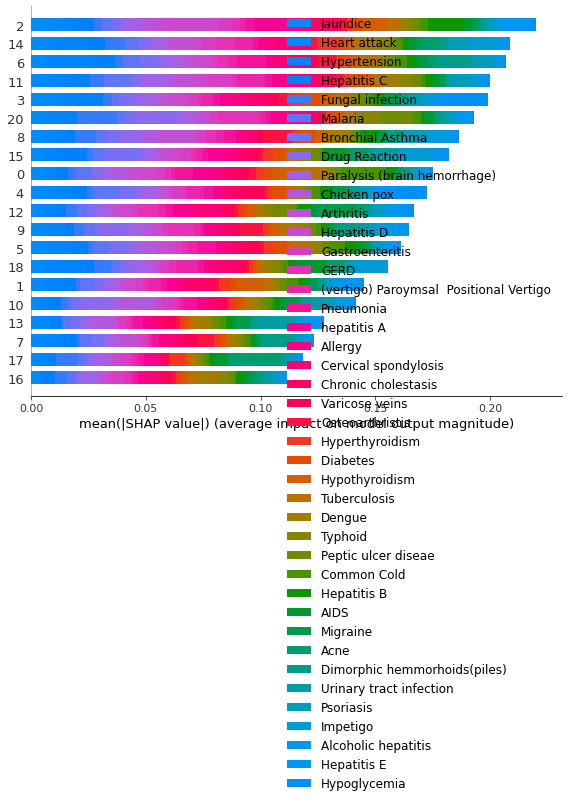

In [432]:
shap.summary_plot(shap_values, X_importance, plot_type='bar',class_names=rf.classes_)

In [433]:
rf.classes_

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

Hepatitis C


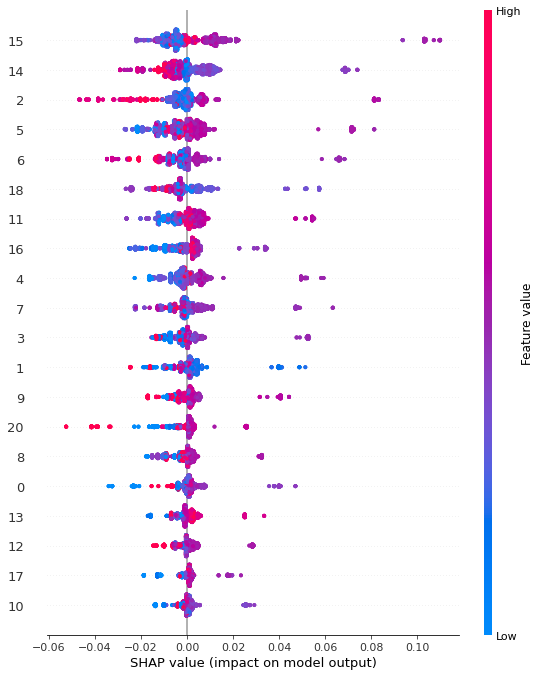

In [434]:
# shap.summary_plot(shap_values, X_importance, class_names=rf.classes_)
print(rf.classes_[20])
shap.summary_plot(shap_values[20], X_importance,   class_names=rf.classes_[20])


In [193]:
xtest
xtest.replace({ "False":0,  "True":1}, inplace = True)

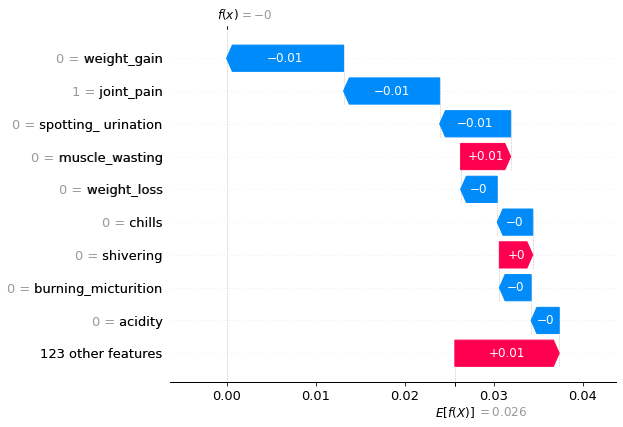

In [194]:
#Localised explaination of data point
from shap import waterfall_plot,Explainer, Explanation,TreeExplainer
shap.initjs()
# shap.force_plot(explainer.expected_value[5], shap_values[5])
explainer = TreeExplainer(rf)
sv = explainer(xtest)

exp = Explanation(sv[:,:,6], sv.base_values[:,6], xtest, feature_names=xtest.columns.tolist())
idx = 5 # datapoint to explain
waterfall_plot(exp[idx])


In [197]:
pd.options.display.max_columns = None


In [435]:
pd.options.display.max_columns = None
ytest.iloc[[20]]

,prognosis
4126,Common Cold


In [198]:
xtest.iloc[[5]]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
2991,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0


In [175]:
df=pd.DataFrame(mca.column_contributions_)

In [177]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
itching_False,5.016623e-06,0.000354,0.001481,0.000017,4.089777e-04,0.000578,8.295935e-04,0.000054,0.001768,0.001073,...,2.255932e-04,1.444816e-03,1.218141e-04,0.001092,0.000557,0.000053,0.000062,0.000003,1.441143e-05,0.003015
itching_True,3.097764e-05,0.002184,0.009147,0.000105,2.525437e-03,0.003571,5.122740e-03,0.000332,0.010916,0.006627,...,1.393038e-03,8.921742e-03,7.522021e-04,0.006746,0.003438,0.000328,0.000384,0.000019,8.899060e-05,0.018620
skin_rash_False,8.651206e-06,0.000336,0.000045,0.001581,2.936655e-05,0.000818,3.160482e-04,0.003999,0.013642,0.000137,...,1.643306e-04,2.985739e-04,1.076906e-03,0.005796,0.000745,0.002911,0.002668,0.000054,1.781435e-04,0.000944
skin_rash_True,4.398970e-05,0.001708,0.000227,0.008039,1.493232e-04,0.004161,1.607044e-03,0.020334,0.069366,0.000697,...,8.355894e-04,1.518190e-03,5.475858e-03,0.029473,0.003789,0.014803,0.013568,0.000276,9.058252e-04,0.004799
nodal_skin_eruptions_False,2.555478e-06,0.000009,0.000010,0.000037,1.091257e-08,0.000012,8.616099e-06,0.000003,0.000077,0.000045,...,6.375020e-08,2.214074e-05,3.260840e-07,0.000093,0.000014,0.000006,0.000074,0.000014,2.220597e-07,0.000168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blister_True,2.610405e-05,0.000300,0.000830,0.002241,4.961156e-05,0.001059,2.786288e-05,0.001284,0.005328,0.001750,...,2.170178e-03,1.745878e-07,6.393578e-04,0.051863,0.073516,0.002675,0.005872,0.124662,9.984362e-05,0.005979
red_sore_around_nose_False,6.307324e-07,0.000007,0.000020,0.000055,1.212152e-06,0.000026,6.893558e-07,0.000031,0.000130,0.000042,...,5.277892e-05,4.681342e-09,1.545519e-05,0.001256,0.001779,0.000065,0.000142,0.003004,2.395936e-06,0.000143
red_sore_around_nose_True,2.652230e-05,0.000309,0.000852,0.002303,5.097098e-05,0.001087,2.898741e-05,0.001319,0.005460,0.001787,...,2.219354e-03,1.968504e-07,6.498905e-04,0.052822,0.074791,0.002728,0.005968,0.126337,1.007491e-04,0.006033
yellow_crust_ooze_False,6.081083e-07,0.000007,0.000019,0.000052,1.160118e-06,0.000025,6.543540e-07,0.000030,0.000124,0.000041,...,5.066676e-05,4.216947e-09,1.489596e-05,0.001209,0.001713,0.000062,0.000137,0.002901,2.320335e-06,0.000139


In [436]:
final_df = df.sort_values(by=[15,14,2], ascending=False)
df_index=pd.DataFrame(final_df.index)
df_index.head(15)

,0
0,red_sore_around_nose_True
1,yellow_crust_ooze_True
2,blister_True
3,bladder_discomfort_True
4,continuous_feel_of_urine_True
5,foul_smell_of urine_True
6,burning_micturition_True
7,diarrhoea_True
8,coma_True
9,stomach_bleeding_True


In [43]:
########Untill now Rf has been explained with shap

In [ ]:
#Let's explore above model of 73% accracy to improve with neural network 

In [299]:
import pandas as pd
import numpy as np
import os
import shutil
import pickle as pk
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras import models
import keras
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [298]:
# import pandas as pd
# import numpy as np
# import os
# import shutil
# import pickle as pk
# import matplotlib.pyplot as plt

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow import Model as models
# from  tensorflow import keras
# from keras.layers import layers
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.models import load_model

ImportError: ignored

In [ ]:
# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest = train_test_split(X,P,test_size=0.4,random_state=20)

In [200]:
P = train['prognosis']
X = train.drop(['prognosis'],axis=1)

In [204]:
# y=P.astype(str).astype(float)
x=pd.get_dummies(X)
y=pd.get_dummies(P)

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# Generate TrainX and TrainY
trainX, testX, trainY, testY = train_test_split(x, y, test_size= 1 - train_ratio)
# Genearate ValX, TestX, ValY and TestY
valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))

In [205]:
print(trainX.shape)
print(valX.shape)
print(testX.shape)

(3443, 132)
(738, 132)
(739, 132)


In [206]:
input_shape = trainX.shape[1]

n_batch_size = 20

n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)
n_validation_steps = int(valX.shape[0] / n_batch_size)
n_test_steps = int(testX.shape[0] / n_batch_size)

n_epochs = 25

num_classes = 41

print('Input Shape: ' + str(input_shape))
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()
print('Validation Steps: ' + str(n_validation_steps))
print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))
print()
print('Number of Classes: ' + str(num_classes))

Input Shape: 132
Batch Size: 20

Steps per Epoch: 172

Validation Steps: 36
Test Steps: 36

Number of Epochs: 25

Number of Classes: 41


In [238]:
model = models.Sequential()
model.call = tf.function(model.call)
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [239]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                8512      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 41)                2665      
                                                                 
Total params: 15,337
Trainable params: 15,337
Non-trainable params: 0
_________________________________________________________________


In [240]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [244]:
# Prepare a directory to store all the checkpoints.
checkpoint_no = 'ckpt_1_ANN1'
model_name = 'Bird_ANN_2FC_F64_64_epoch_25'
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, 
                                   monitor='val_loss', save_best_only=True, mode='auto')]

In [245]:
type(xt)

pandas.core.frame.DataFrame

In [246]:
history = model.fit(trainX,
                    trainY,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX, valY),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])

Train on 172 samples, validate on 738 samples
Epoch 1/25
172/172 [==============================] - 5s 31ms/step - batch: 85.5000 - size: 1.0000 - loss: 0.0114 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 2/25
172/172 [==============================] - 3s 16ms/step - batch: 85.5000 - size: 1.0000 - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 3/25
172/172 [==============================] - 3s 18ms/step - batch: 85.5000 - size: 1.0000 - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 4/25
172/172 [==============================] - 3s 20ms/step - batch: 85.5000 - size: 1.0000 - loss: 0.0011 - acc: 1.0000 - val_loss: 8.5305e-04 - val_acc: 1.0000
Epoch 5/25
172/172 [==============================] - 4s 25ms/step - batch: 85.5000 - size: 1.0000 - loss: 7.1260e-04 - acc: 1.0000 - val_loss: 5.9634e-04 - val_acc: 1.0000
Epoch 6/25
172/172 [==============================] - 3s 17ms/step - batch: 85.5000 - size: 1.0000 - loss: 5.0879e-04

In [247]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

,epoch,loss,acc,val_loss,val_acc
0,1,0.011406,1.0,0.005212,1.0
1,2,0.003548,1.0,0.002318,1.0
2,3,0.001764,1.0,0.001317,1.0
3,4,0.001065,1.0,0.000853,1.0
4,5,0.000713,1.0,0.000596,1.0


In [266]:
test['prognosis'].count()

42

In [248]:
X_test = test.drop(['prognosis'],axis=1)

In [260]:
test['prognosis']

0                            Fungal infection
1                                     Allergy
2                                        GERD
3                         Chronic cholestasis
4                               Drug Reaction
5                         Peptic ulcer diseae
6                                        AIDS
7                                   Diabetes 
8                             Gastroenteritis
9                            Bronchial Asthma
10                              Hypertension 
11                                   Migraine
12                       Cervical spondylosis
13               Paralysis (brain hemorrhage)
14                                   Jaundice
15                                    Malaria
16                                Chicken pox
17                                     Dengue
18                                    Typhoid
19                                hepatitis A
20                                Hepatitis B
21                                

In [249]:
# Compute predictions
predictions = model.predict(X_test)
predicted_class = np.argmax(predictions, axis=1)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [272]:
y_col = trainY.columns

In [273]:
y_col

Index(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ', 'Dimorphic hemmorhoids(piles)',
       'Drug Reaction', 'Fungal infection', 'GERD', 'Gastroenteritis',
       'Heart attack', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D',
       'Hepatitis E', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A'],
      dtype='object')

In [281]:
pred = model.predict(X_test)
y = np.argmax(pred, axis=1)
y

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 27])

In [287]:
import numpy as np   
labels = np.array(y_col)
indices = y
predicted_output=np.array(labels)[indices]
predicted_output

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo', 'Impetigo'],
      dtype=object)

In [286]:
print(test['prognosis'])

0                            Fungal infection
1                                     Allergy
2                                        GERD
3                         Chronic cholestasis
4                               Drug Reaction
5                         Peptic ulcer diseae
6                                        AIDS
7                                   Diabetes 
8                             Gastroenteritis
9                            Bronchial Asthma
10                              Hypertension 
11                                   Migraine
12                       Cervical spondylosis
13               Paralysis (brain hemorrhage)
14                                   Jaundice
15                                    Malaria
16                                Chicken pox
17                                     Dengue
18                                    Typhoid
19                                hepatitis A
20                                Hepatitis B
21                                

In [271]:
predictions[0]

array([5.5911720e-10, 9.1880387e-10, 1.5656063e-08, 7.9902318e-10,
       2.5519276e-10, 1.4893719e-07, 4.6011553e-10, 3.0645100e-10,
       2.0414340e-07, 4.6059209e-11, 2.1534940e-09, 4.1945989e-09,
       3.0266549e-09, 9.3393098e-08, 7.0743042e-08, 9.9999875e-01,
       1.3619843e-09, 1.0717491e-09, 4.5797716e-11, 3.9066748e-08,
       7.6880703e-11, 1.3236038e-11, 4.8305973e-09, 1.1685870e-10,
       6.2454270e-10, 6.7950916e-09, 3.2339678e-09, 2.0629297e-08,
       1.5986272e-08, 3.2203917e-11, 2.5385894e-08, 3.2940872e-07,
       6.8699769e-08, 6.9342521e-10, 6.1804761e-10, 3.4730256e-08,
       2.1958829e-10, 2.1508679e-08, 6.6852026e-09, 6.0351063e-10,
       1.5734116e-14], dtype=float32)

In [258]:
print(predicted_class)


[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27 27]


In [219]:
trainX

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
1047,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
569,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3887,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,

In [230]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()

In [232]:
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [334]:
xt1=trainX
xt2=testX

In [336]:
type(xt2)

pandas.core.frame.DataFrame

In [333]:
#Lets run the shap plot it will take 10 mins to show the results

In [337]:
from shap import DeepExplainer,KernelExplainer
import numpy

 
# DF, based on which importance is checked
X_importance = trainX

# Explain model predictions using shap library:
explainer = shap.DeepExplainer(model, xt1)
shap_values = explainer.shap_values(numpy.array(xt2))
shap_values
# select a set of background examples to take an expectation over

# background = xtrainx
# explainer = shap.DeepExplainer(
#     (model.layers[0].input, model.layers[-1].output), background
# )
# shap_values = explainer.shap_values(numpy.array(xtestx[:10])) # <-- HERE !

# print the JS visualization code to the notebook
# shap.initjs()
# shap.force_plot(
#     explainer.expected_value[0], shap_values[0][0], feature_names=trainX.columns
# )

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


[array([[ 3.44536813e-10,  2.06431878e-09,  5.23604680e-11, ...,
         -1.28739419e-10,  4.08380188e-10,  9.68674163e-11],
        [ 5.61659971e-10,  2.11323924e-09,  7.39224077e-11, ...,
         -1.07758639e-10,  1.86665511e-10,  1.01855251e-10],
        [ 4.12529110e-08,  1.11494639e-08,  2.85516604e-09, ...,
          8.15144497e-09, -5.61369081e-09,  3.25176465e-09],
        ...,
        [ 2.27385878e-08, -1.55505597e-03,  4.36604136e-09, ...,
         -2.43878841e-03, -3.63261644e-03, -2.99350225e-03],
        [-6.53550060e-09, -1.35571845e-03, -7.97590787e-11, ...,
         -2.35925509e-03, -3.35051259e-03, -2.84629186e-03],
        [ 6.45897055e-10,  2.14164283e-09,  6.73286816e-11, ...,
         -9.83491408e-11,  1.56936250e-10,  9.27720356e-11]]),
 array([[ 8.36355015e-10,  1.15624061e-09,  6.44765836e-11, ...,
          2.93910512e-10,  2.64994493e-10,  2.79313417e-10],
        [ 3.10250989e-09,  3.65874987e-09,  1.44934971e-10, ...,
          3.39305856e-10,  3.32743566e

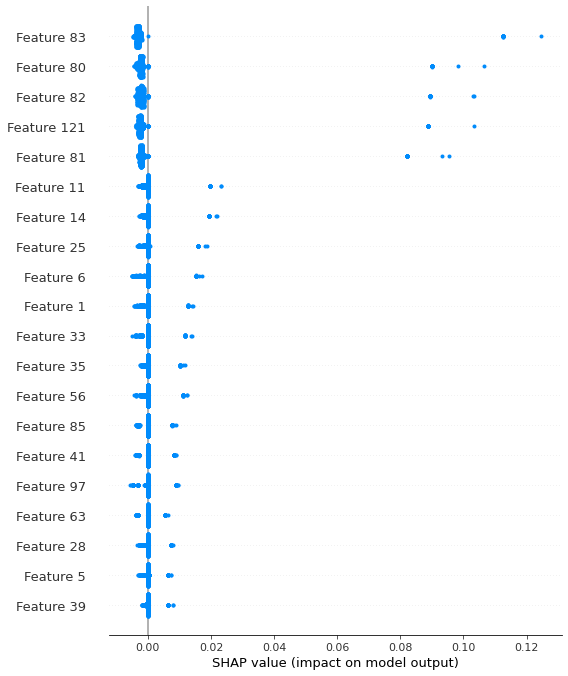

In [341]:

# shap.summary_plot(shap_values, X_importance, class_names=rf.classes_)
# print(model.load_weights)
# print(ytrain)
# shap.plots.waterfall(shap_values[3])

shap.summary_plot(shap_values[5])


In [342]:
#97 accuraccy on test data using MLP%
X = test.drop(["prognosis"],axis=1)
Y = test["prognosis"]

model.evaluate(pd.get_dummies(X), pd.get_dummies(Y))


[0.10694242232957982, 0.97619045]

In [339]:
#  xt,ytrain,xtest mca params

In [351]:
#####***********
xtrain

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
180,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1910,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2475,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [347]:

from prince import MCA
# mca = MCA()
mca = MCA(n_components = 21, n_iter = 30, random_state = 101)
mca=mca.fit(xtrain)

In [349]:
df_mca=pd.DataFrame(mca.eigenvalues_summary)
df_mca

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.073,7.32%,7.32%
1,0.066,6.60%,13.93%
2,0.052,5.20%,19.13%
3,0.048,4.84%,23.97%
4,0.043,4.35%,28.32%
5,0.037,3.75%,32.07%
6,0.036,3.62%,35.69%
7,0.035,3.52%,39.21%
8,0.034,3.39%,42.59%


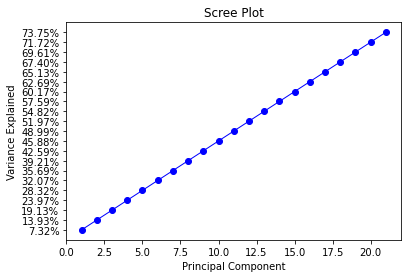

In [348]:
import matplotlib.pyplot as plt
import numpy as np
PC_values = np.arange(mca.n_components) + 1
plt.plot(PC_values, df_mca['% of variance (cumulative)'], 'o-', linewidth=1, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [350]:
xtr=mca.transform(xtrain)

In [355]:
P = ytrain
X = xtr

# y=P.astype(str).astype(float)
x=pd.get_dummies(X)
y=pd.get_dummies(P)


In [356]:

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# Generate TrainX and TrainY
trainX, testX, trainY, testY = train_test_split(x, y, test_size= 1 - train_ratio)
# Genearate ValX, TestX, ValY and TestY
valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))

print(trainX.shape)
print(valX.shape)
print(testX.shape)


(2410, 21)
(517, 21)
(517, 21)


In [357]:
input_shape = trainX.shape[1]
n_batch_size = 20
n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)
n_validation_steps = int(valX.shape[0] / n_batch_size)
n_test_steps = int(testX.shape[0] / n_batch_size)
n_epochs = 25
num_classes = 41

print('Input Shape: ' + str(input_shape))
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()
print('Validation Steps: ' + str(n_validation_steps))
print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))
print()
print('Number of Classes: ' + str(num_classes))


Input Shape: 21
Batch Size: 20

Steps per Epoch: 120

Validation Steps: 25
Test Steps: 25

Number of Epochs: 25

Number of Classes: 41


In [358]:
model = models.Sequential()
model.call = tf.function(model.call)
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


In [359]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1408      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 41)                2665      
                                                                 
Total params: 8,233
Trainable params: 8,233
Non-trainable params: 0
_________________________________________________________________


In [360]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [361]:
# Prepare a directory to store all the checkpoints.
checkpoint_no = 'ckpt_1_ANN2'
model_name = 'Bird_ANN_2FC_F64_6_epoch_25'
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, 
                                   monitor='val_loss', save_best_only=True, mode='auto')]

In [362]:
history = model.fit(trainX,
                    trainY,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX, valY),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])

Train on 120 samples, validate on 517 samples
Epoch 1/25
119/120 [============================>.] - ETA: 0s - batch: 59.0000 - size: 1.0000 - loss: 2.7394 - acc: 0.5098

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


120/120 [==============================] - 2s 17ms/step - batch: 59.5000 - size: 1.0000 - loss: 2.7271 - acc: 0.5127 - val_loss: 1.2424 - val_acc: 0.8511
Epoch 2/25
120/120 [==============================] - 1s 11ms/step - batch: 59.5000 - size: 1.0000 - loss: 0.5224 - acc: 0.9808 - val_loss: 0.1901 - val_acc: 1.0000
Epoch 3/25
120/120 [==============================] - 2s 15ms/step - batch: 59.5000 - size: 1.0000 - loss: 0.1034 - acc: 1.0000 - val_loss: 0.0521 - val_acc: 1.0000
Epoch 4/25
120/120 [==============================] - 2s 15ms/step - batch: 59.5000 - size: 1.0000 - loss: 0.0348 - acc: 1.0000 - val_loss: 0.0222 - val_acc: 1.0000
Epoch 5/25
120/120 [==============================] - 1s 10ms/step - batch: 59.5000 - size: 1.0000 - loss: 0.0171 - acc: 1.0000 - val_loss: 0.0123 - val_acc: 1.0000
Epoch 6/25
120/120 [==============================] - 1s 9ms/step - batch: 59.5000 - size: 1.0000 - loss: 0.0103 - acc: 1.0000 - val_loss: 0.0079 - val_acc: 1.0000
Epoch 7/25
120/120 [==

In [363]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

,epoch,loss,acc,val_loss,val_acc
0,1,2.727080,0.512721,1.242408,0.851064
1,2,0.522414,0.980809,0.190114,1.000000
2,3,0.103383,1.000000,0.052143,1.000000
3,4,0.034802,1.000000,0.022249,1.000000
4,5,0.017129,1.000000,0.012331,1.000000


In [365]:
test['prognosis'].count()
X_test = test.drop(['prognosis'],axis=1)

test['prognosis'].head(5)


0       Fungal infection
1                Allergy
2                   GERD
3    Chronic cholestasis
4          Drug Reaction
Name: prognosis, dtype: object

In [ ]:
#get MCA for xtest

In [367]:
# Compute predictions for MCA
predictions = model.predict(xtestmca)
predicted_class = np.argmax(predictions, axis=1)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [368]:
y_col = trainY.columns
y_col


Index(['prognosis_(vertigo) Paroymsal  Positional Vertigo', 'prognosis_AIDS',
       'prognosis_Acne', 'prognosis_Alcoholic hepatitis', 'prognosis_Allergy',
       'prognosis_Arthritis', 'prognosis_Bronchial Asthma',
       'prognosis_Cervical spondylosis', 'prognosis_Chicken pox',
       'prognosis_Chronic cholestasis', 'prognosis_Common Cold',
       'prognosis_Dengue', 'prognosis_Diabetes ',
       'prognosis_Dimorphic hemmorhoids(piles)', 'prognosis_Drug Reaction',
       'prognosis_Fungal infection', 'prognosis_GERD',
       'prognosis_Gastroenteritis', 'prognosis_Heart attack',
       'prognosis_Hepatitis B', 'prognosis_Hepatitis C',
       'prognosis_Hepatitis D', 'prognosis_Hepatitis E',
       'prognosis_Hypertension ', 'prognosis_Hyperthyroidism',
       'prognosis_Hypoglycemia', 'prognosis_Hypothyroidism',
       'prognosis_Impetigo', 'prognosis_Jaundice', 'prognosis_Malaria',
       'prognosis_Migraine', 'prognosis_Osteoarthristis',
       'prognosis_Paralysis (brain hemorr

In [371]:
pred = model.predict(xtestmca)
y = np.argmax(pred, axis=1)
len(y)


1476

In [372]:
import numpy as np   
labels = np.array(y_col)
indices = y
predicted_output=np.array(labels)[indices]


array(['prognosis_Hepatitis C', 'prognosis_Malaria', 'prognosis_Malaria',
       ..., 'prognosis_Dengue', 'prognosis_Common Cold',
       'prognosis_Peptic ulcer diseae'], dtype=object)

In [391]:
predicted_output[5]

'prognosis_Hepatitis C'

In [376]:
predictions[0]


array([7.6896981e-07, 2.3798276e-07, 1.8639390e-05, 6.6632873e-07,
       2.4118216e-09, 7.6575274e-11, 1.9799053e-07, 1.4951968e-05,
       7.4410351e-04, 6.3949325e-03, 2.3793161e-06, 2.6191792e-05,
       5.2570203e-06, 8.2876813e-06, 1.2556920e-07, 1.5719076e-08,
       1.3595469e-09, 1.3607124e-08, 1.7328202e-05, 2.0357406e-04,
       9.5637178e-01, 1.2575562e-02, 5.2622519e-04, 1.5254093e-11,
       1.8590250e-09, 4.6087731e-05, 1.8206567e-05, 1.2947781e-06,
       2.9280733e-03, 2.3114020e-05, 1.1188957e-06, 9.3592502e-07,
       3.6025600e-07, 2.2370024e-03, 6.7719629e-11, 2.0256915e-04,
       5.5645141e-03, 1.9091612e-08, 7.3257594e-05, 8.8416145e-06,
       1.1983302e-02], dtype=float32)

In [375]:
print(predicted_class)

[20 29 29 ... 11 10 33]


In [378]:
xt1=trainX
xt2=testX

In [379]:
from shap import DeepExplainer,KernelExplainer
import numpy

 
# DF, based on which importance is checked
X_importance = trainX
# Explain model predictions using shap library:
explainer = shap.DeepExplainer(model, xt1)
shap_values = explainer.shap_values(numpy.array(xt2))
shap_values
# select a set of background examples to take an expectation over
# background = xtrainx
# explainer = shap.DeepExplainer(
#     (model.layers[0].input, model.layers[-1].output), background
# )
# shap_values = explainer.shap_values(numpy.array(xtestx[:10])) # <-- HERE !
# print the JS visualization code to the notebook
# shap.initjs()
# shap.force_plot(
#     explainer.expected_value[0], shap_values[0][0], feature_names=trainX.columns
# )


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


[array([[-7.51873163e-04, -1.26876037e-03,  8.54881523e-05, ...,
          1.81497457e-04, -2.62009903e-03, -2.09125655e-04],
        [ 2.55474387e-04,  2.71022981e-04,  1.09302421e-04, ...,
         -1.41498958e-03, -2.21436060e-03, -1.04569546e-02],
        [ 1.67506656e-04, -1.43727732e-05,  5.05063933e-05, ...,
         -4.99328983e-04, -3.79157512e-03, -3.06890841e-04],
        ...,
        [-5.58655720e-04, -9.59150928e-04, -4.90646253e-04, ...,
          1.63232549e-04, -4.48019838e-03, -4.55246111e-03],
        [-6.08803897e-04,  1.76521035e-03, -3.05050155e-03, ...,
          8.41331342e-05,  1.42118999e-04,  3.08568644e-04],
        [-1.86965081e-03, -1.45231392e-03, -1.08553113e-04, ...,
          3.49426624e-04, -9.05080427e-04,  1.56524093e-04]]),
 array([[-9.08353227e-04, -2.58264468e-04, -7.97268638e-04, ...,
         -5.78957276e-03, -6.65769931e-03, -2.51408972e-04],
        [ 5.95279776e-05, -1.93038492e-04, -6.78165873e-04, ...,
          1.13536626e-03, -3.67297151e

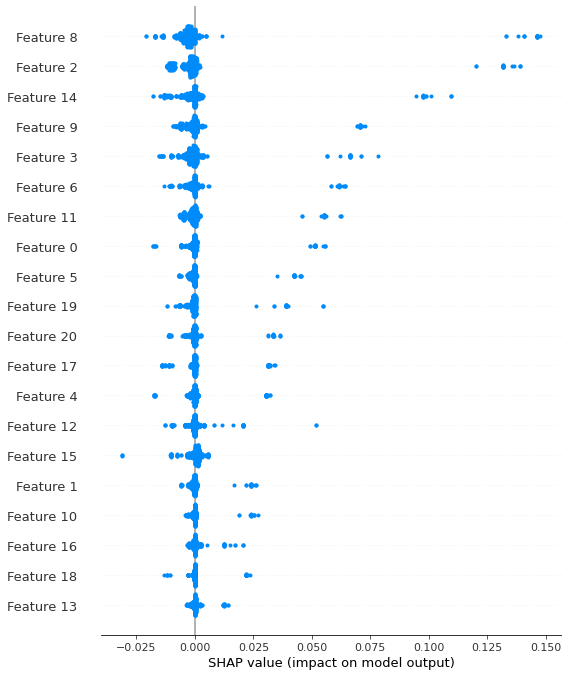

In [380]:
shap.summary_plot(shap_values[5])

In [ ]:
X = test.drop(["prognosis"],axis=1)
Y = test["prognosis"]

model.evaluate(pd.get_dummies(X), pd.get_dummies(Y))

In [381]:
df=pd.DataFrame(mca.column_contributions_)

In [382]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
itching_False,5.016623e-06,0.000354,0.001481,0.000017,4.089777e-04,0.000578,8.295935e-04,0.000054,0.001768,0.001073,4.802585e-03,2.255932e-04,1.444816e-03,1.218141e-04,0.001092,0.000557,0.000053,0.000062,0.000003,1.441143e-05,0.003015
itching_True,3.097764e-05,0.002184,0.009147,0.000105,2.525437e-03,0.003571,5.122740e-03,0.000332,0.010916,0.006627,2.965596e-02,1.393038e-03,8.921742e-03,7.522021e-04,0.006746,0.003438,0.000328,0.000384,0.000019,8.899060e-05,0.018620
skin_rash_False,8.651206e-06,0.000336,0.000045,0.001581,2.936655e-05,0.000818,3.160482e-04,0.003999,0.013642,0.000137,5.322919e-07,1.643306e-04,2.985739e-04,1.076906e-03,0.005796,0.000745,0.002911,0.002668,0.000054,1.781435e-04,0.000944
skin_rash_True,4.398970e-05,0.001708,0.000227,0.008039,1.493232e-04,0.004161,1.607044e-03,0.020334,0.069366,0.000697,2.706601e-06,8.355894e-04,1.518190e-03,5.475858e-03,0.029473,0.003789,0.014803,0.013568,0.000276,9.058252e-04,0.004799
nodal_skin_eruptions_False,2.555478e-06,0.000009,0.000010,0.000037,1.091257e-08,0.000012,8.616099e-06,0.000003,0.000077,0.000045,4.204220e-05,6.375020e-08,2.214074e-05,3.260840e-07,0.000093,0.000014,0.000006,0.000074,0.000014,2.220597e-07,0.000168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blister_True,2.610405e-05,0.000300,0.000830,0.002241,4.961156e-05,0.001059,2.786288e-05,0.001284,0.005328,0.001750,9.597605e-05,2.170178e-03,1.745878e-07,6.393578e-04,0.051863,0.073516,0.002675,0.005872,0.124662,9.984362e-05,0.005979
red_sore_around_nose_False,6.307324e-07,0.000007,0.000020,0.000055,1.212152e-06,0.000026,6.893558e-07,0.000031,0.000130,0.000042,2.322191e-06,5.277892e-05,4.681342e-09,1.545519e-05,0.001256,0.001779,0.000065,0.000142,0.003004,2.395936e-06,0.000143
red_sore_around_nose_True,2.652230e-05,0.000309,0.000852,0.002303,5.097098e-05,0.001087,2.898741e-05,0.001319,0.005460,0.001787,9.764813e-05,2.219354e-03,1.968504e-07,6.498905e-04,0.052822,0.074791,0.002728,0.005968,0.126337,1.007491e-04,0.006033
yellow_crust_ooze_False,6.081083e-07,0.000007,0.000019,0.000052,1.160118e-06,0.000025,6.543540e-07,0.000030,0.000124,0.000041,2.236806e-06,5.066676e-05,4.216947e-09,1.489596e-05,0.001209,0.001713,0.000062,0.000137,0.002901,2.320335e-06,0.000139


In [384]:
final_df = df.sort_values(by=[8,2,14], ascending=False)
df_index=pd.DataFrame(final_df.index)
df_index.head(15)

,0
0,skin_rash_True
1,skin_peeling_True
2,small_dents_in_nails_True
3,inflammatory_nails_True
4,silver_like_dusting_True
5,swelling_joints_True
6,painful_walking_True
7,knee_pain_True
8,hip_joint_pain_True
9,muscle_weakness_True


In [389]:
testY.head(10)

,prognosis_(vertigo) Paroymsal Positional Vertigo,prognosis_AIDS,prognosis_Acne,prognosis_Alcoholic hepatitis,prognosis_Allergy,prognosis_Arthritis,prognosis_Bronchial Asthma,prognosis_Cervical spondylosis,prognosis_Chicken pox,prognosis_Chronic cholestasis,prognosis_Common Cold,prognosis_Dengue,prognosis_Diabetes,prognosis_Dimorphic hemmorhoids(piles),prognosis_Drug Reaction,prognosis_Fungal infection,prognosis_GERD,prognosis_Gastroenteritis,prognosis_Heart attack,prognosis_Hepatitis B,prognosis_Hepatitis C,prognosis_Hepatitis D,prognosis_Hepatitis E,prognosis_Hypertension,prognosis_Hyperthyroidism,prognosis_Hypoglycemia,prognosis_Hypothyroidism,prognosis_Impetigo,prognosis_Jaundice,prognosis_Malaria,prognosis_Migraine,prognosis_Osteoarthristis,prognosis_Paralysis (brain hemorrhage),prognosis_Peptic ulcer diseae,prognosis_Pneumonia,prognosis_Psoriasis,prognosis_Tuberculosis,prognosis_Typhoid,prognosis_Urinary tract infection,prognosis_Varicose veins,prognosis_hepatitis A
4027,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3890,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3874,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [390]:
testX.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
4027,0.081259,0.006422,-0.032908,-0.026878,0.033653,-0.181915,0.149149,-0.065533,-0.089807,0.071814,0.000876,0.080329,0.026746,0.047049,-0.085128,0.155187,-0.006968,0.084313,-0.020393,0.136106,-0.058212
872,-0.062547,-0.124766,0.025224,-0.034203,-0.047947,0.071631,-0.078866,0.070075,-0.064190,0.122378,-0.101845,0.043028,0.324361,-0.149854,-0.024710,-0.032121,-0.017289,-0.004901,-0.033840,0.119931,0.652768
4395,-0.054523,-0.091834,-0.058151,-0.052355,-0.057043,0.009395,0.066786,0.024855,-0.051881,0.034823,0.075737,-0.094962,0.068114,0.085352,0.087434,-0.111467,-0.203782,-0.051325,0.001819,0.113514,0.049336
2242,0.064291,-0.183304,0.344900,0.096007,-0.011281,0.083148,-0.001302,0.027166,-0.043977,-0.045885,0.035847,-0.042873,0.073606,0.028044,0.040502,-0.087104,-0.023821,-0.053916,-0.006934,0.012122,0.065310
3890,-0.034387,-0.101054,-0.062888,-0.038338,-0.140130,0.147476,0.070136,-0.060744,0.000364,0.018485,-0.036804,-0.298222,0.006244,-0.011667,-0.273079,-0.036914,-0.280521,-0.076425,0.142119,-0.134446,-0.030866
3874,0.027379,-0.144999,0.592339,0.116339,0.277848,-0.100562,-0.319729,0.221507,0.141770,0.100204,-0.505570,0.306935,-0.328905,-0.146295,0.080080,-0.159312,-0.371880,0.090407,0.101654,-0.024512,-0.015955
4453,0.464052,0.165033,0.210086,0.223530,0.075159,-0.479782,0.307572,-0.184158,-0.170196,0.041887,0.002822,0.156499,-0.000932,-0.145557,-0.173249,0.033375,0.183699,0.000134,-0.029008,0.113287,0.129602
3203,-0.055879,-0.141398,0.050345,-0.011110,-0.066545,0.090335,-0.060269,0.065314,-0.077349,0.130778,-0.084660,0.027502,0.336483,-0.154501,-0.034092,-0.041240,-0.017223,-0.011597,-0.032193,0.141234,0.657881
4237,0.010018,-0.115951,0.196626,0.079410,0.069105,-0.035428,-0.036224,0.074420,-0.022430,0.042071,0.013046,0.005863,0.005626,0.050467,0.042154,0.008769,-0.047320,0.002830,0.008791,0.014259,-0.026835
4801,-0.060023,-0.107438,-0.108848,-0.180248,-0.007779,-0.094498,-0.057054,-0.032312,0.151424,0.216904,-0.177074,0.025439,-0.022770,0.175060,0.040798,-0.106203,0.133238,-0.080533,0.008444,0.060336,-0.320619


In [65]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=9b332bbbe784d49b2ff2d7224eb570de1622fce4c1c5777ad7aa452e287f5728
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [ ]:
import lime.lime_tabular

In [ ]:
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(xt.values, feature_names=xtrain.columns.values.tolist(),
                                                  class_names=['MEDV'], verbose=True, mode='regression')


In [ ]:
# Choose the 5th instance and use it to predict the results
j = 2
print(xt.values[j])


In [ ]:
# exp = explainer.explain_instance(xt.values[j], model_rf.predict)
exp = explainer.explain_instance(xt.values[j], model_rf.predict, num_features=6)
